# Feature Engineering

- Libraries

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np

- Data

In [2]:
# In second notebook
%store -r final_df

In [3]:
final_df = final_df

## Encoding

In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Status                           2938 non-null   object 
 2   Year                             2938 non-null   int64  
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

- Status is an object, country is also an object.
- I will not encode country because of the number of dimensions, I don't think it also adds value/weight to out predictions as is.

In [5]:
final_df['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

- Status has two categories, I will use OneHotEncoder

### OneHotEncoder

- Import OHE from sklearn

In [6]:
from sklearn.preprocessing import OneHotEncoder

- Parse OHE to variable enc

In [7]:
enc = OneHotEncoder(sparse_output=False)
enc_array = enc.fit_transform(final_df[['Status']])

- Encode

In [8]:
# Get feature names (column names for the encoded features)
feature_names = enc.get_feature_names_out(['Status'])

# Create a DataFrame with encoded values
encoded_df = pd.DataFrame(enc_array, columns=feature_names)

# Concatenate with original DataFrame (if needed)
final_df_encoded = pd.concat([final_df.drop('Status', axis=1), encoded_df], axis=1)

- Final encoded df

In [9]:
final_df_encoded.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.0,1.0
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.0,1.0
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.0,1.0
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.0,1.0
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.0,1.0


In [10]:
df = final_df_encoded

## Transforming data

In [11]:
df.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developed',
       'Status_Developing'],
      dtype='object')

In [12]:
cols2 = ['Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developed',
       'Status_Developing']

In [13]:
import sys
import os

# Add the parent directory to sys.path to access utils/
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from utils.kde_plt import kde_plt_grid  # Import the function


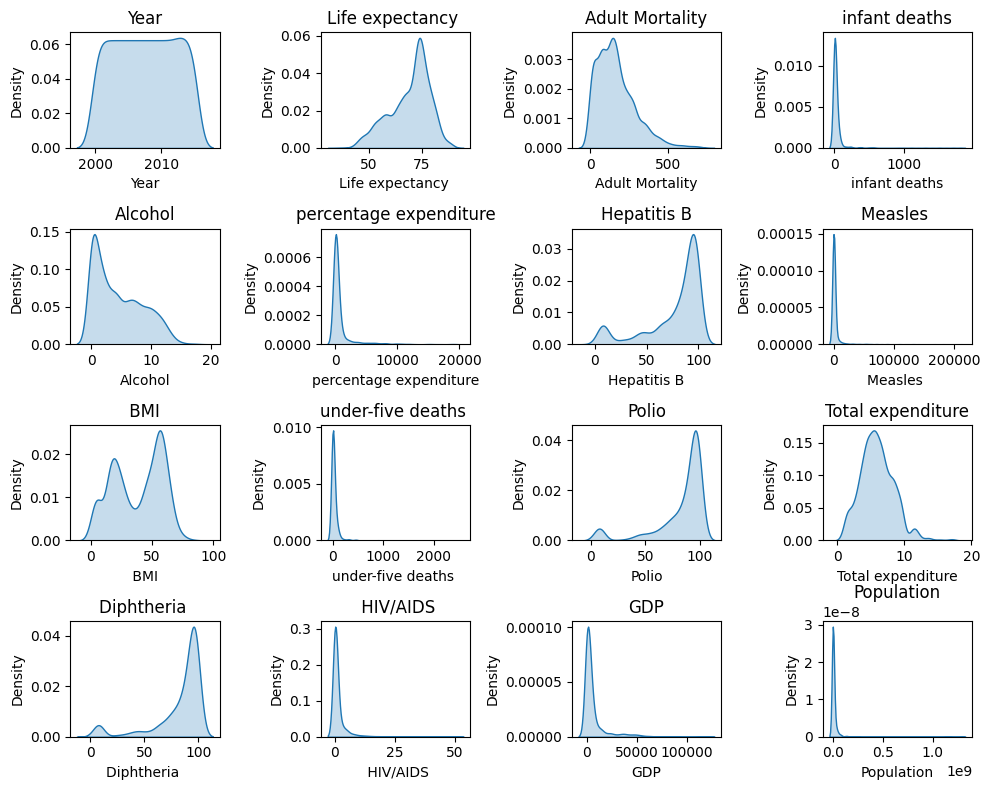

In [14]:
kde_plt_grid(df, cols2)

### Skewness

- Skewness is a measure of the asymmetry of a distribution.

> A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values.     
> A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values.
> A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.


In [15]:
df[cols2].skew()

Year                               -0.006409
Life expectancy                    -0.641348
Adult Mortality                     1.176477
infant deaths                       9.786963
Alcohol                             0.604600
percentage expenditure              4.652051
Hepatitis B                        -1.508544
Measles                             9.441332
 BMI                               -0.197379
under-five deaths                   9.495065
Polio                              -2.070211
Total expenditure                   0.628101
Diphtheria                         -2.056656
 HIV/AIDS                           5.396112
GDP                                 3.511815
Population                         17.332212
 thinness  1-19 years               1.708024
 thinness 5-9 years                 1.778947
Income composition of resources    -1.128536
Schooling                          -0.619125
Status_Developed                    1.718238
Status_Developing                  -1.718238
dtype: flo

Skew in 
> Adult Mortality
> infant deaths
> percentage expenditure
> Hepatitis B
> Measles
> under-five months
> polio
> Diptheria
> HIV/AIDS
> GDP
> Population

### Kurtosis

- kurtosis is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution.

- The kurtosis of a normal distribution is 3.
- If a given distribution has a kurtosis less than 3, it is said to be #playkurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution.
- If a given distribution has a kurtosis greater than 3, it is said to be #leptokurtic, which means it tends to produce more outliers than the normal distribution.

In [16]:
df[cols2].kurt()

Year                                -1.213722
Life expectancy                     -0.226412
Adult Mortality                      1.756646
infant deaths                      116.042756
Alcohol                             -0.779822
percentage expenditure              26.573387
Hepatitis B                          1.138465
Measles                            114.859903
 BMI                                -1.302949
under-five deaths                  109.752795
Polio                                3.625335
Total expenditure                    1.124652
Diphtheria                           3.484149
 HIV/AIDS                           34.892008
GDP                                 14.946594
Population                         362.646601
 thinness  1-19 years                3.995507
 thinness 5-9 years                  4.391798
Income composition of resources      1.321339
Schooling                            0.915995
Status_Developed                     0.952991
Status_Developing                 

In [17]:
df.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developed',
       'Status_Developing'],
      dtype='object')

In [18]:
from scipy.stats import boxcox

# Log transformation (adding 1 to avoid log(0)) - for very high skew, reducing scale impact
columns_log = ['infant deaths', 'percentage expenditure', 'Measles ', 
               'under-five deaths ', 'GDP', 'Population', 
               ' thinness  1-19 years', ' thinness 5-9 years']

df[columns_log] = np.log1p(df[columns_log])

# Box-Cox transformation (requires positive values)- for moderate skew that still needs correction
columns_boxcox = ['Adult Mortality','Hepatitis B',' HIV/AIDS',  'Polio', 'Diphtheria ', 'Income composition of resources', 'Alcohol',' BMI ' ]
for col in columns_boxcox:
    df[col], _ = boxcox(df[col] + 1)  # Add 1 to handle zeros

In [19]:
df[cols2].skew()

Year                              -0.006409
Life expectancy                   -0.641348
Adult Mortality                   -0.080569
infant deaths                      0.701769
Alcohol                           -0.079922
percentage expenditure            -0.078266
Hepatitis B                       -0.898736
Measles                            0.555483
 BMI                              -0.295449
under-five deaths                  0.647154
Polio                             -1.021315
Total expenditure                  0.628101
Diphtheria                        -1.034352
 HIV/AIDS                          0.969222
GDP                               -0.080053
Population                        -0.577464
 thinness  1-19 years              0.125018
 thinness 5-9 years                0.098643
Income composition of resources   -0.155001
Schooling                         -0.619125
Status_Developed                   1.718238
Status_Developing                 -1.718238
dtype: float64

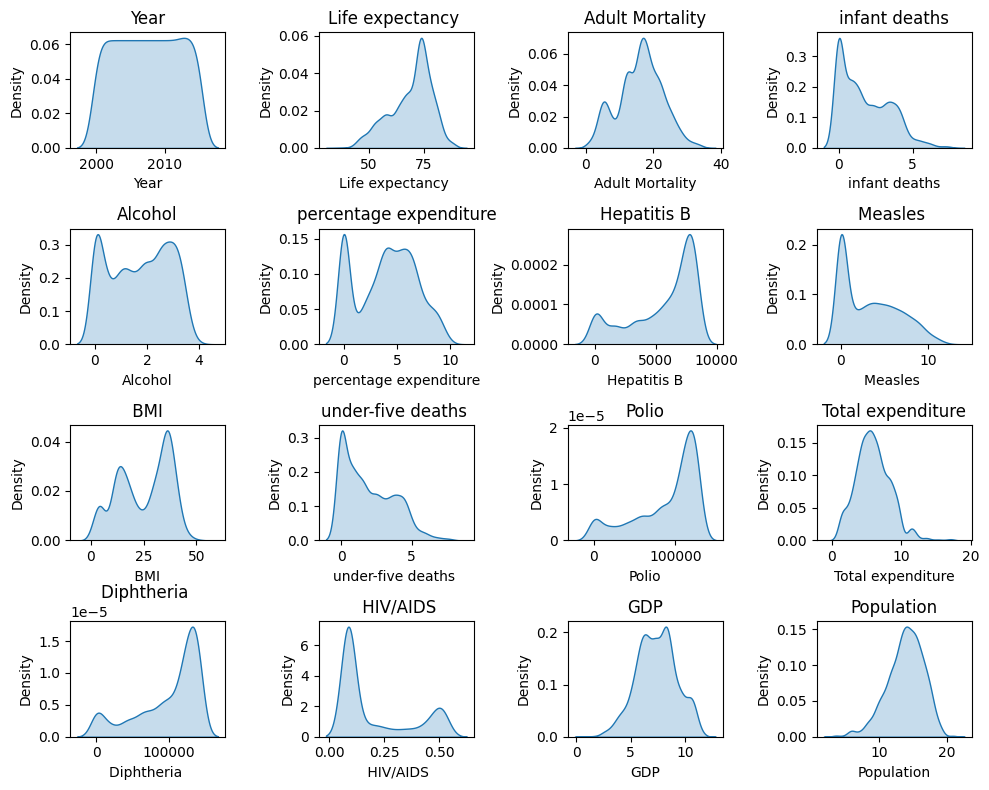

In [20]:
kde_plt_grid(df, cols2)

## Scaling

In [21]:
# Standardization for remaining numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
scaled_cols = columns_log + columns_boxcox
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [23]:
df[scaled_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
infant deaths,2938.0,-4.474146e-17,1.00017,-1.063659,-1.063659,-0.229916,0.822084,3.444630
percentage expenditure,2938.0,-1.015752e-16,1.00017,-1.460516,-0.823780,0.074028,0.771693,2.158341
Measles,2938.0,4.353223e-17,1.00017,-1.030248,-1.030248,-0.143220,0.777204,2.733829
under-five deaths,2938.0,5.562452e-17,1.00017,-1.089025,-1.089025,-0.185601,0.801135,3.303062
GDP,2938.0,-1.451074e-17,1.00017,-3.475761,-0.692461,0.002421,0.661662,2.370781
Population,2938.0,-3.434209e-16,1.00017,-3.862207,-0.622642,0.088827,0.721630,2.664479
thinness 1-19 years,2938.0,0.000000e+00,1.00017,-1.996866,-0.786561,-0.046347,0.829553,2.592193
thinness 5-9 years,2938.0,-1.064121e-16,1.00017,-1.967197,-0.774157,-0.044503,0.818902,2.599222
Adult Mortality,2938.0,1.160859e-16,1.00017,-2.332848,-0.620835,0.070747,0.667497,2.809981
Hepatitis B,2938.0,-1.547813e-16,1.00017,-2.079593,-0.675279,0.389609,0.815342,1.008787


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841,2000.000000,2004.000000,2008.000000,2012.000000,2015.000000
Life expectancy,2938.0,6.923468e+01,9.511540,36.300000,63.200000,72.100000,75.675000,89.000000
Adult Mortality,2938.0,1.160859e-16,1.000170,-2.332848,-0.620835,0.070747,0.667497,2.809981
infant deaths,2938.0,-4.474146e-17,1.000170,-1.063659,-1.063659,-0.229916,0.822084,3.444630
Alcohol,2938.0,1.838027e-16,1.000170,-1.477208,-0.922806,0.092704,0.880862,2.041213
percentage expenditure,2938.0,-1.015752e-16,1.000170,-1.460516,-0.823780,0.074028,0.771693,2.158341
Hepatitis B,2938.0,-1.547813e-16,1.000170,-2.079593,-0.675279,0.389609,0.815342,1.008787
Measles,2938.0,4.353223e-17,1.000170,-1.030248,-1.030248,-0.143220,0.777204,2.733829
BMI,2938.0,2.902149e-17,1.000170,-2.006713,-0.917865,0.278139,0.892490,2.281993
under-five deaths,2938.0,5.562452e-17,1.000170,-1.089025,-1.089025,-0.185601,0.801135,3.303062


In [25]:

import joblib
joblib.dump(scaler, "/home/davidkibet/Desktop/Life Expectancy ML/models/LE_scaler.pkl")

['/home/davidkibet/Desktop/Life Expectancy ML/models/LE_scaler.pkl']

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841,2000.000000,2004.000000,2008.000000,2012.000000,2015.000000
Life expectancy,2938.0,6.923468e+01,9.511540,36.300000,63.200000,72.100000,75.675000,89.000000
Adult Mortality,2938.0,1.160859e-16,1.000170,-2.332848,-0.620835,0.070747,0.667497,2.809981
infant deaths,2938.0,-4.474146e-17,1.000170,-1.063659,-1.063659,-0.229916,0.822084,3.444630
Alcohol,2938.0,1.838027e-16,1.000170,-1.477208,-0.922806,0.092704,0.880862,2.041213
percentage expenditure,2938.0,-1.015752e-16,1.000170,-1.460516,-0.823780,0.074028,0.771693,2.158341
Hepatitis B,2938.0,-1.547813e-16,1.000170,-2.079593,-0.675279,0.389609,0.815342,1.008787
Measles,2938.0,4.353223e-17,1.000170,-1.030248,-1.030248,-0.143220,0.777204,2.733829
BMI,2938.0,2.902149e-17,1.000170,-2.006713,-0.917865,0.278139,0.892490,2.281993
under-five deaths,2938.0,5.562452e-17,1.000170,-1.089025,-1.089025,-0.185601,0.801135,3.303062


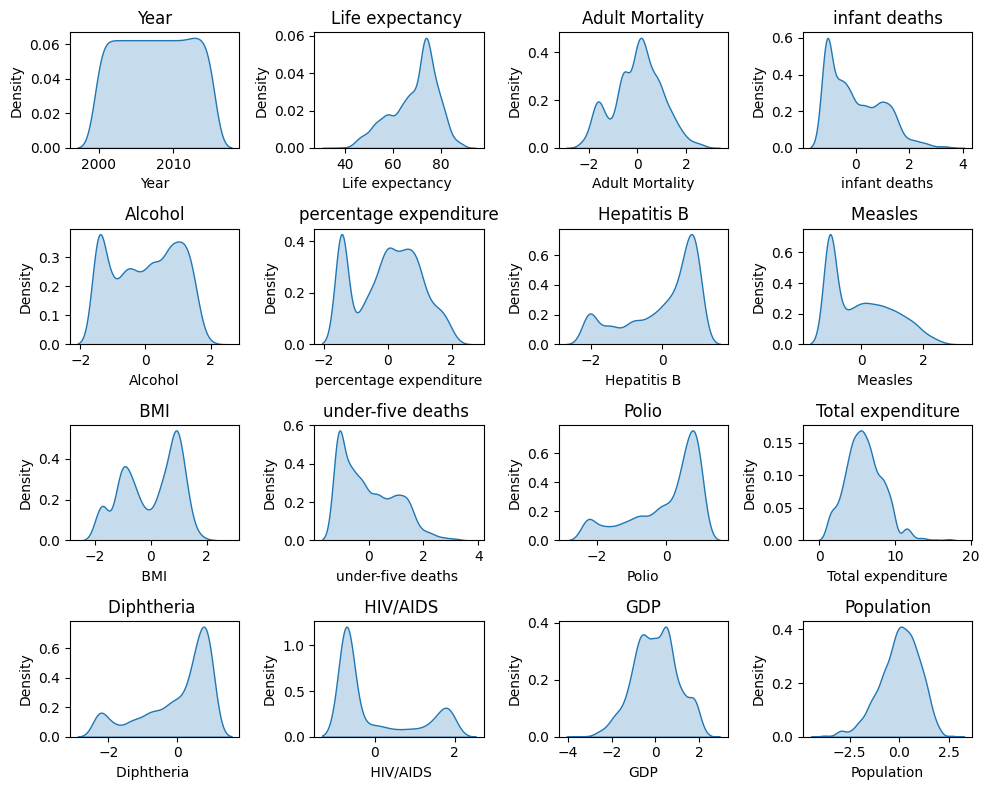

In [27]:
kde_plt_grid(df, cols2)

In [28]:
%store df

Stored 'df' (DataFrame)
